In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
sns.set_style("whitegrid")

In [6]:
%matplotlib inline

In [7]:
from pandas_datareader import data, wb
from pandas_datareader import DataReader

In [8]:
from datetime import datetime

In [9]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [10]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [11]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [12]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-11,1043.800049,1032.050049,1035.500000,1041.099976,1192800,1041.099976
2017-12-12,1050.310059,1033.689941,1039.630005,1040.479980,1279500,1040.479980
2017-12-13,1046.665039,1038.380005,1046.119995,1040.609985,1282700,1040.609985
2017-12-14,1058.500000,1043.109985,1045.000000,1049.150024,1558700,1049.150024
2017-12-15,1067.619995,1049.500000,1054.609985,1064.189941,3275900,1064.189941


In [13]:
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,1126.370853,1102.919442,1114.827248,1114.674616,1.697308e+06,1114.674616
std,63.548985,66.866223,65.613670,65.520596,7.060421e+05,65.520596
min,1020.989990,980.640015,993.409973,1001.520020,6.790000e+05,1001.520020
25%,1073.375000,1048.260010,1059.910034,1062.559998,1.254950e+06,1062.559998
50%,1115.000000,1096.010010,1104.589966,1103.979980,1.506400e+06,1103.979980
75%,1176.299988,1156.664978,1167.664978,1166.894958,1.956600e+06,1166.894958
max,1273.890015,1249.020020,1271.000000,1268.329956,4.857900e+06,1268.329956


In [14]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-12-11 to 2018-12-10
Data columns (total 6 columns):
High         251 non-null float64
Low          251 non-null float64
Open         251 non-null float64
Close        251 non-null float64
Volume       251 non-null int64
Adj Close    251 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


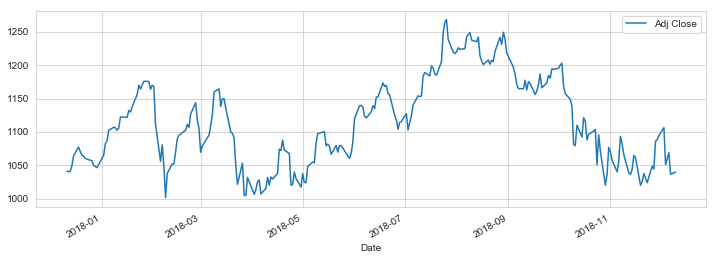

In [15]:
GOOG["Adj Close"].plot(legend=True,figsize=(12,4))

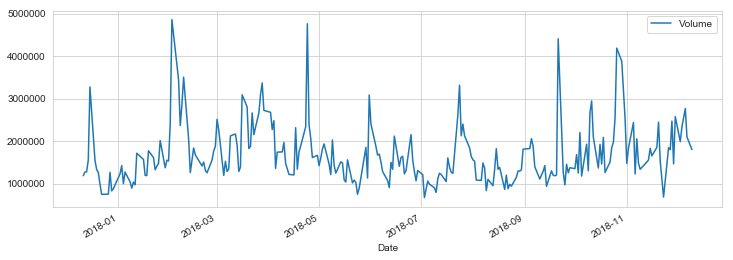

In [16]:
GOOG['Volume'].plot(legend = True,figsize=(12,4))

In [17]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days'%(str(ma))
    GOOG[column_name] = GOOG['Adj Close'].rolling(ma).mean()
    

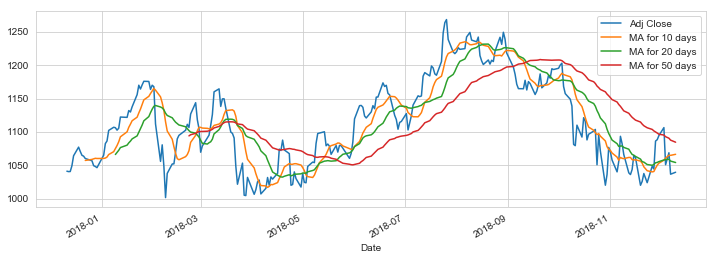

In [18]:
GOOG[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days',]].plot(subplots = False,figsize=(12,4))

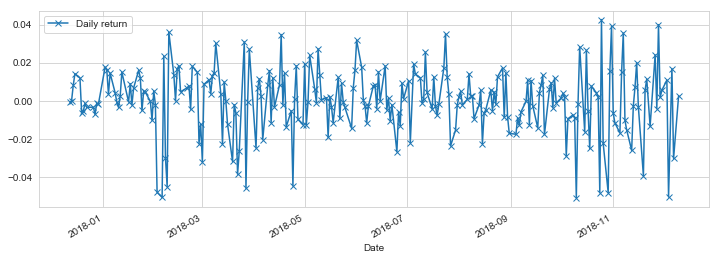

In [19]:
GOOG["Daily return"] = GOOG['Adj Close'].pct_change()
GOOG['Daily return'].plot(figsize = (12,4),legend=True,linestyle='-',marker='x')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


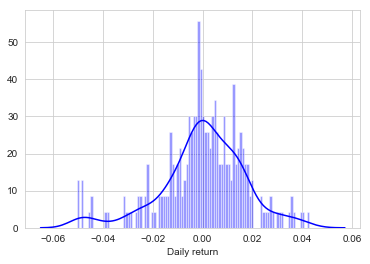

In [20]:

sns.distplot(GOOG['Daily return'].dropna(), bins = 100, color = 'blue')

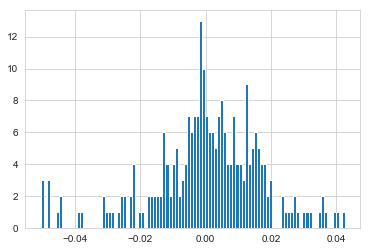

In [21]:
GOOG['Daily return'].hist(bins=100)

In [22]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [23]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-11,170.116028,1168.920044,1041.099976,83.779671
2017-12-12,169.160370,1165.079956,1040.479980,84.123711
2017-12-13,169.721939,1164.130005,1040.609985,83.897629
2017-12-14,169.672668,1174.260010,1049.150024,83.248863
2017-12-15,171.396790,1179.140015,1064.189941,85.372101


In [24]:
tech_rets = closing_df.pct_change()

In [25]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-11,NaN,NaN,NaN,NaN
2017-12-12,-0.005618,-0.003285,-0.000596,0.004106
2017-12-13,0.003320,-0.000815,0.000125,-0.002687
2017-12-14,-0.000290,0.008702,0.008207,-0.007733
2017-12-15,0.010161,0.004156,0.014335,0.025505


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


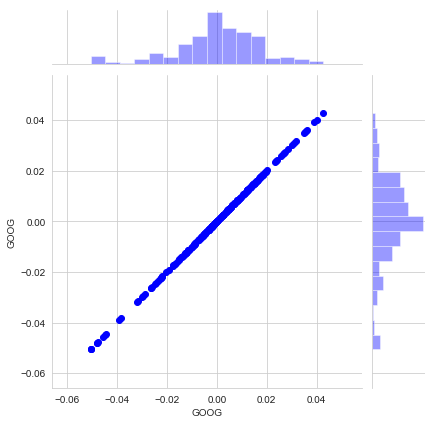

In [26]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color = 'blue')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


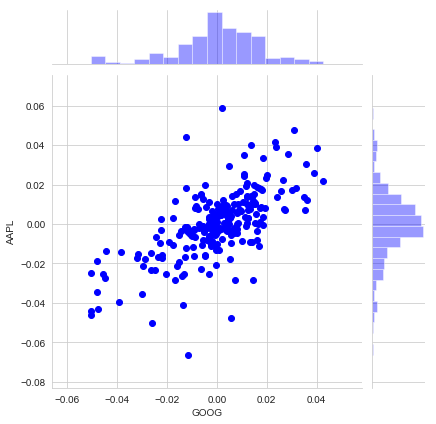

In [27]:
sns.jointplot('GOOG','AAPL',tech_rets,kind='scatter',color = 'blue')

In [28]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-11,NaN,NaN,NaN,NaN
2017-12-12,-0.005618,-0.003285,-0.000596,0.004106
2017-12-13,0.003320,-0.000815,0.000125,-0.002687
2017-12-14,-0.000290,0.008702,0.008207,-0.007733
2017-12-15,0.010161,0.004156,0.014335,0.025505


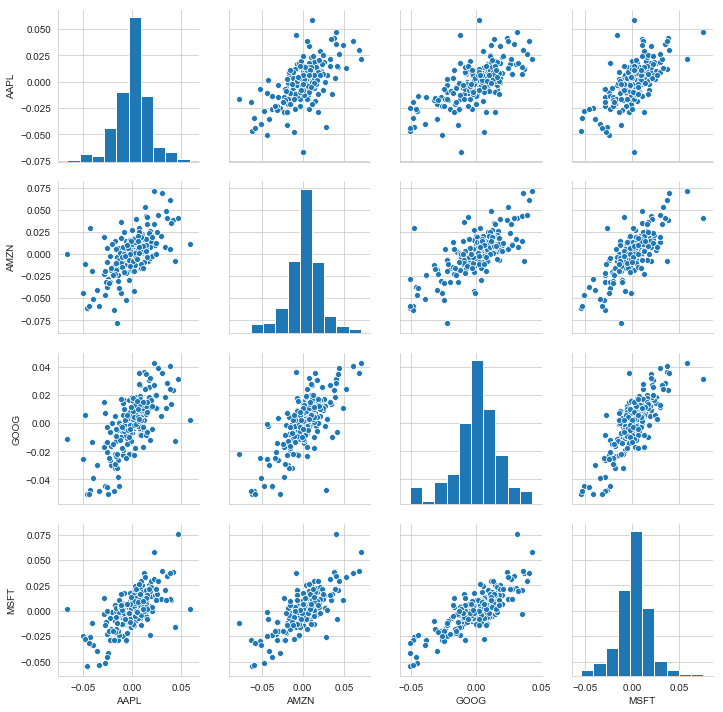

In [29]:
sns.pairplot(tech_rets.dropna())

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


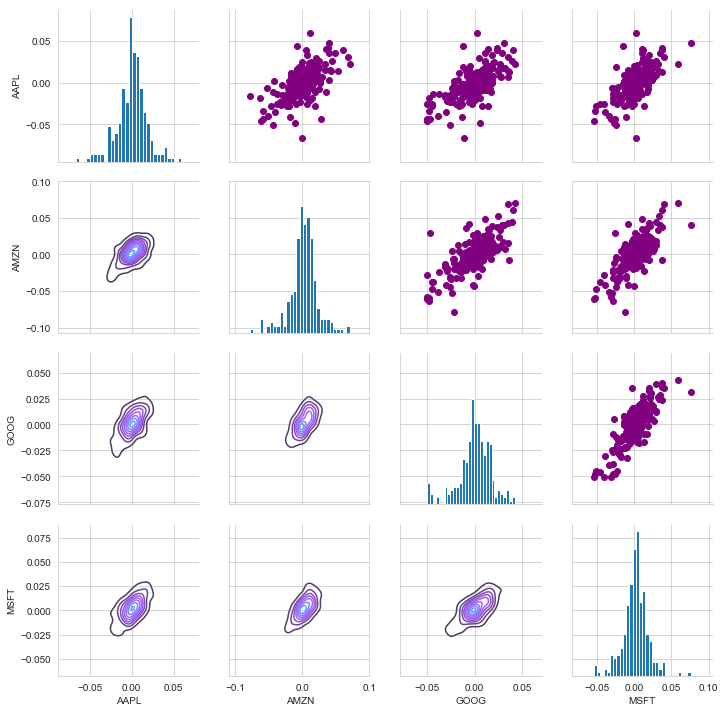

In [30]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30) 

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


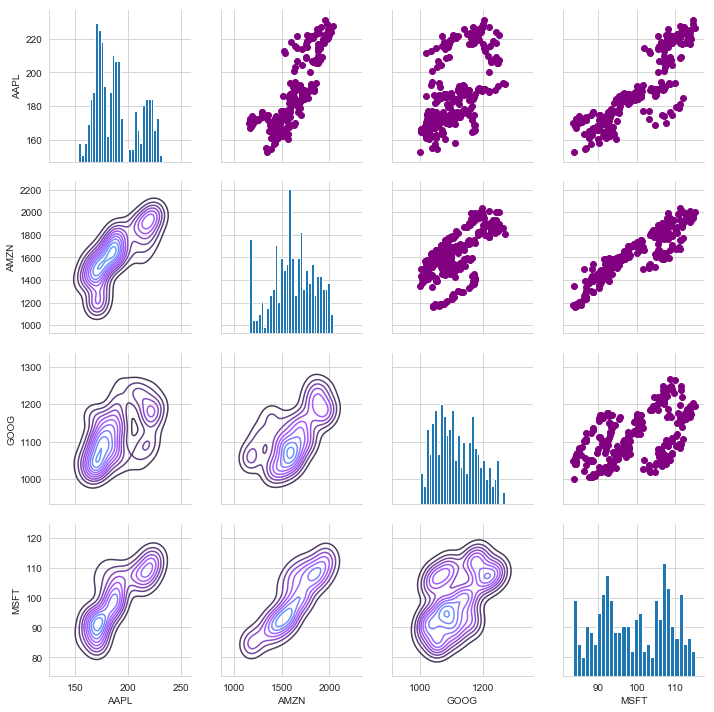

In [31]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30) 

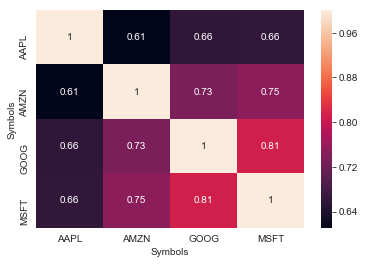

In [32]:
#the change of using heatmap
sns.heatmap(tech_rets.dropna().corr(),annot = True)

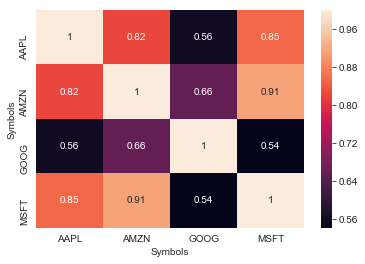

In [33]:
sns.heatmap(closing_df.dropna().corr(),annot = True)

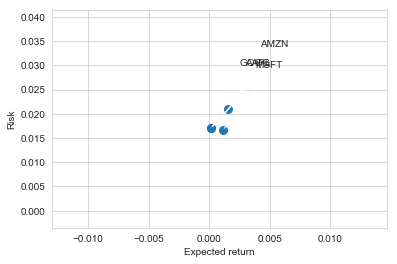

In [34]:
rets = tech_rets.dropna()
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (60, 60),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.1'))

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


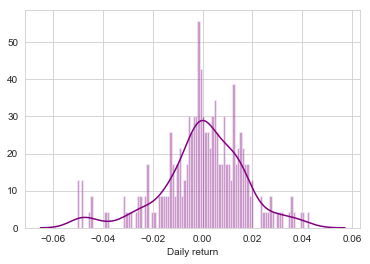

In [35]:
sns.distplot(GOOG['Daily return'].dropna(),bins = 100,color = 'purple')

In [36]:
rets.head()


Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-12,-0.005618,-0.003285,-0.000596,0.004106
2017-12-13,0.003320,-0.000815,0.000125,-0.002687
2017-12-14,-0.000290,0.008702,0.008207,-0.007733
2017-12-15,0.010161,0.004156,0.014335,0.025505
2017-12-18,0.014083,0.009702,0.012169,-0.005412


In [37]:
rets['AAPL'].quantile(0.05)

-0.02791854874697634

In [38]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [39]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    
    price = np.zeros(days)
    
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price



In [40]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,Daily return
Date,,,,,,,,,,
2017-12-11,1043.800049,1032.050049,1035.500000,1041.099976,1192800,1041.099976,NaN,NaN,NaN,NaN
2017-12-12,1050.310059,1033.689941,1039.630005,1040.479980,1279500,1040.479980,NaN,NaN,NaN,-0.000596
2017-12-13,1046.665039,1038.380005,1046.119995,1040.609985,1282700,1040.609985,NaN,NaN,NaN,0.000125
2017-12-14,1058.500000,1043.109985,1045.000000,1049.150024,1558700,1049.150024,NaN,NaN,NaN,0.008207
2017-12-15,1067.619995,1049.500000,1054.609985,1064.189941,3275900,1064.189941,NaN,NaN,NaN,0.014335


Text(0.5, 1.0, 'Monte carlo analytics for Google')

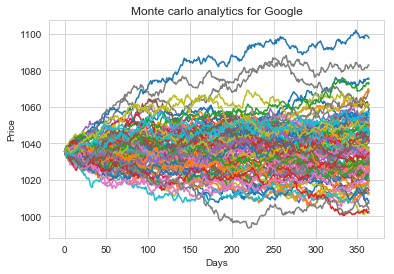

In [41]:
start_price = 1035.5

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte carlo analytics for Google')

In [42]:
runs = 10000

simluations = np.zeros(runs)

for run in range(runs):
    simluations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]


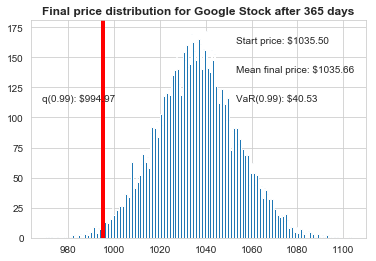

In [43]:
q = np.percentile(simluations,1)

plt.hist(simluations, bins=200)


plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simluations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Text(0.5, 1.0, 'Monte carlo analytics for AAPL')

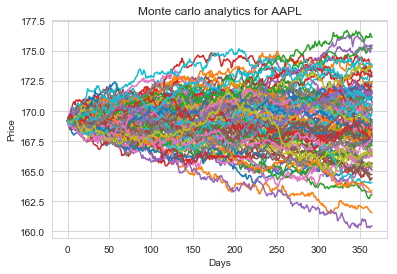

In [45]:
days = 365

dt = 1/days

mu = rets.mean()['AAPL']

sigma = rets.std()['AAPL']

def stock_monte_carlo(start_price,days,mu,sigma):
    
    
    price = np.zeros(days)
    
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

start_price = 169.2

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte carlo analytics for AAPL')

In [46]:
runs = 10000

simluations = np.zeros(runs)

for run in range(runs):
    simluations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

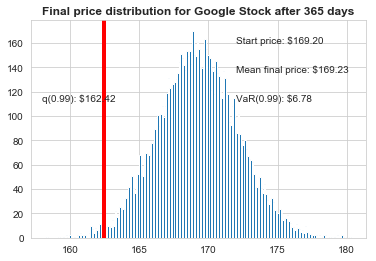

In [47]:
q = np.percentile(simluations,1)

plt.hist(simluations, bins=200)


plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simluations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');